# Generating Word Clouds

### Set up enviroment

In [1]:
from pyhive import hive

import re
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
conn = hive.Connection(host = 'hadoop.rcc.uchicago.edu', 
                       port = 10000, 
                       username = 'mtoolsidas', 
                       database = 'dmp_yelp_rs')
cursor = conn.cursor()

### Load Data

In [4]:
query = 'select user_id, business_id, `date`, text, stars from dmp_yelp_rs.review'
cursor.execute(query)
res = cursor.fetchall()
df_review = pd.DataFrame(res, columns = [i[0] for i in cursor.description])

In [5]:
query = 'select * from business_basicdata'
cursor.execute(query)
res = cursor.fetchall()
df_business = pd.DataFrame(res, columns = [i[0].split('.')[1] for i in cursor.description])

In [6]:
df_review_slim = df_review[['user_id', 'business_id']]
df_business_slim = df_business[['business_id', 'city', 'state', 'simplified_category']]
df_review_business = df_review.join(df_business_slim.set_index('business_id'), on = 'business_id', how = 'left')

### Prepare Wordcloud

In [7]:
# Define a function to plot word cloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

## Do People Use Different Words in Different Categories of Restaurants?

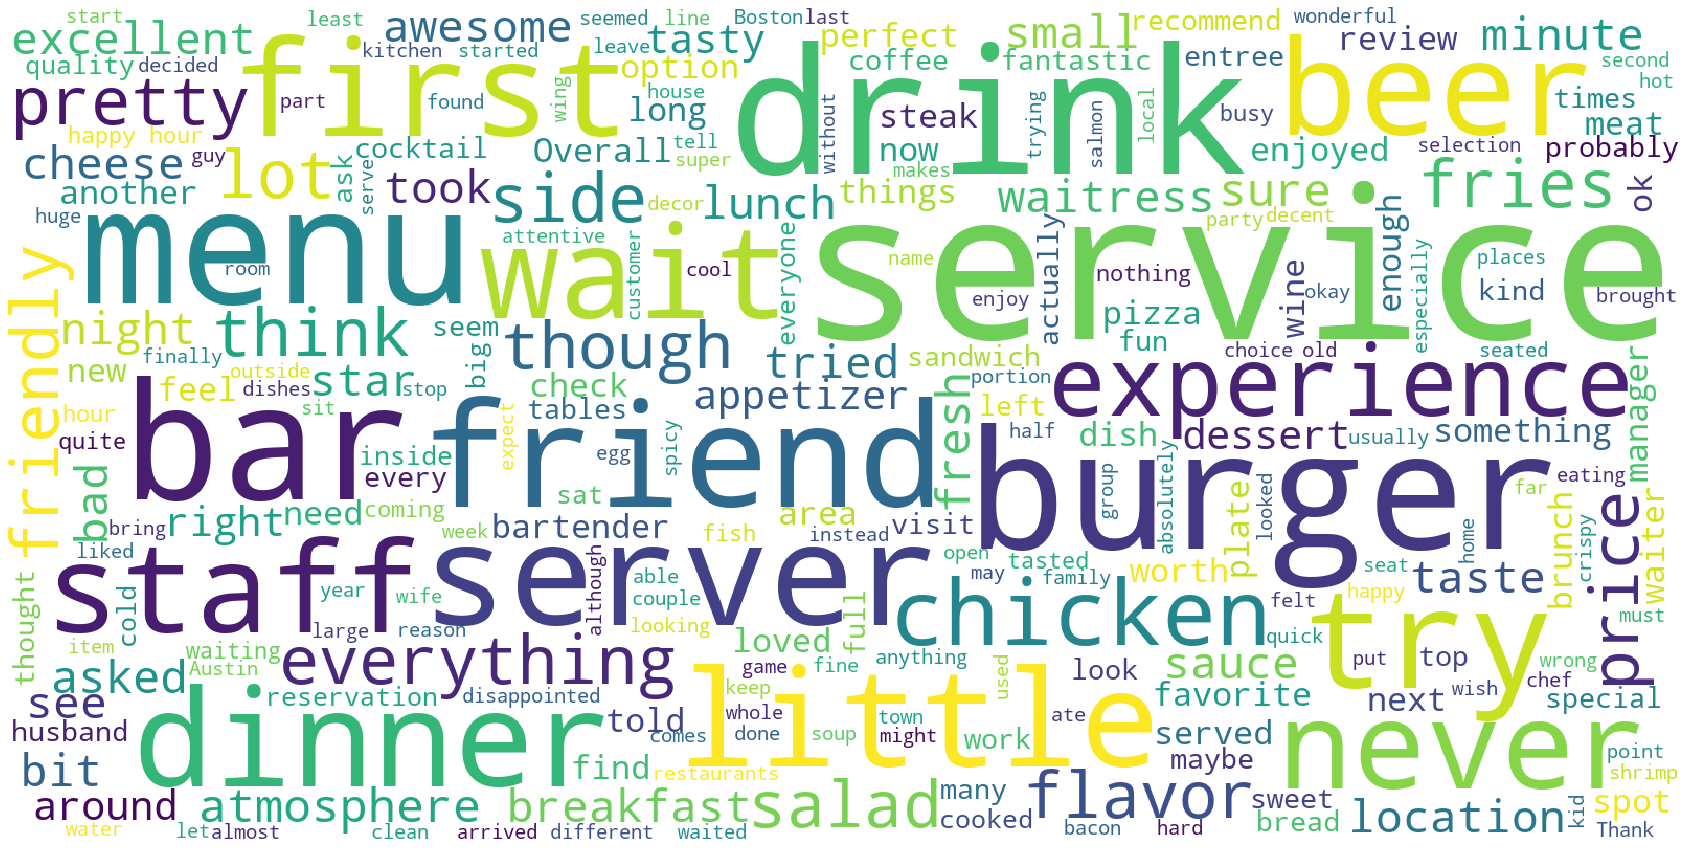

In [9]:
# American
stopwords1 = set(STOPWORDS)
stopwords1.update(["food", "restaurant", "good", "great", "order", "much", "eat", "definitely", "ordered", "best", "delicious", "love", "thing", "nice", "amazing", "table", "well", "better", "meal", "place", "one", "still", "give", "people", "someone", "getting", "us", "day", "know", "going", "make", "take", "say", "two", "gave", "wanted", "want", "u", "really", "come", "came", "way",  "went", "will", "said", "even", "made", "time", "go", "got", "end", "back", "always"])
reviews = df_review_business[df_review_business['simplified_category'] == "American"].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords1)            \
                      .generate(' '.join(reviews['text']))
plot_cloud(wordcloud)

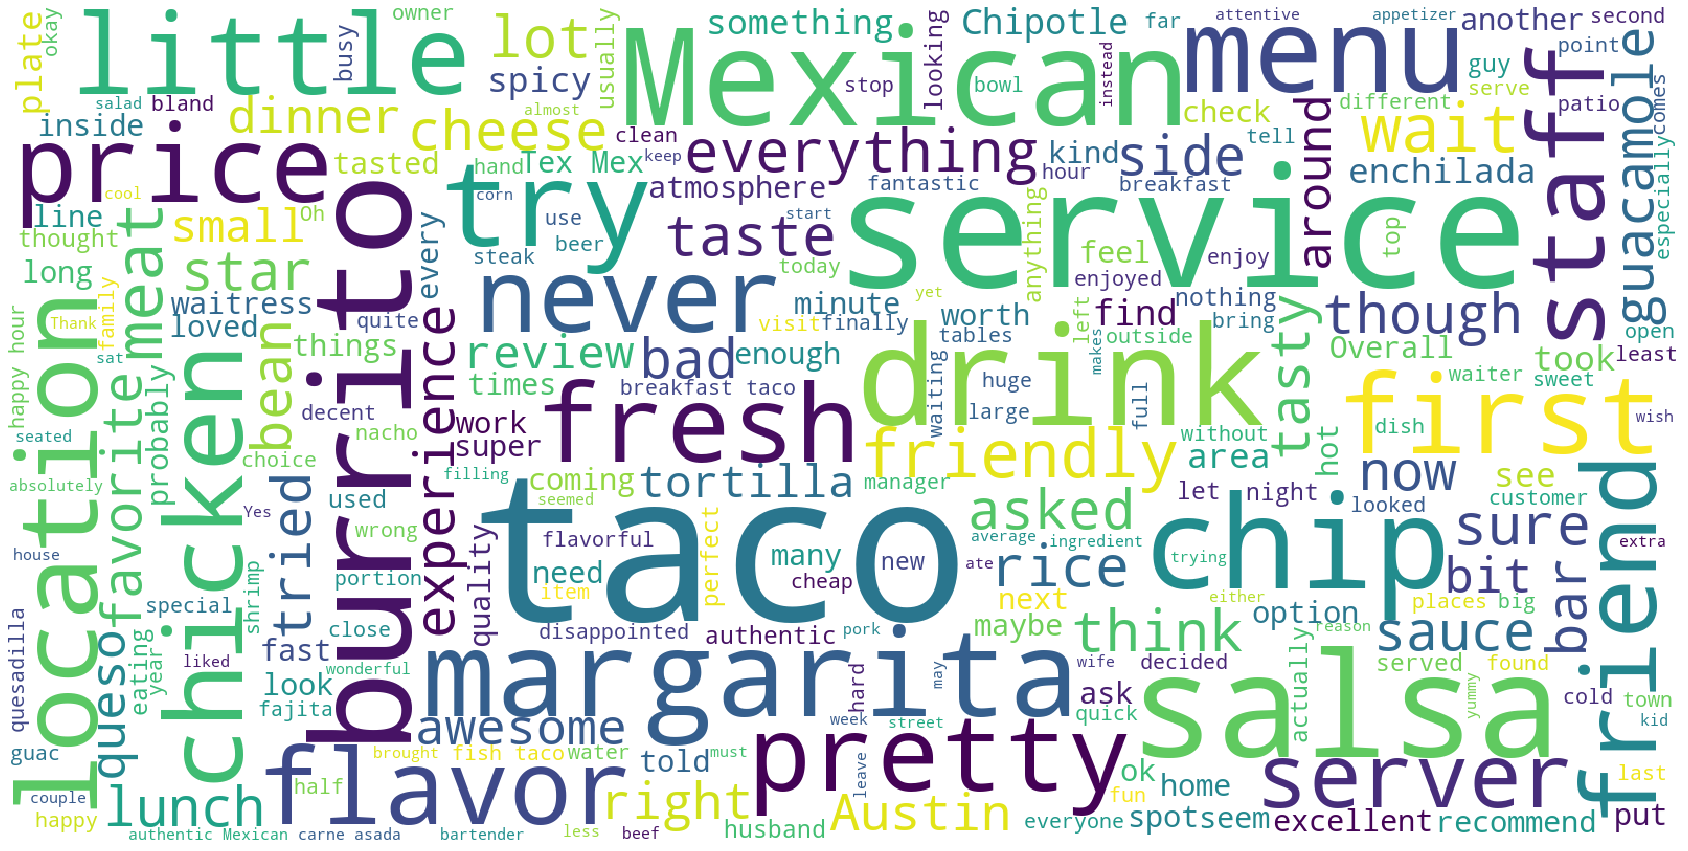

In [10]:
# Mexican
reviews = df_review_business[df_review_business['simplified_category'] == "Mexican"].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords1)            \
                      .generate(' '.join(reviews['text']))
plot_cloud(wordcloud)

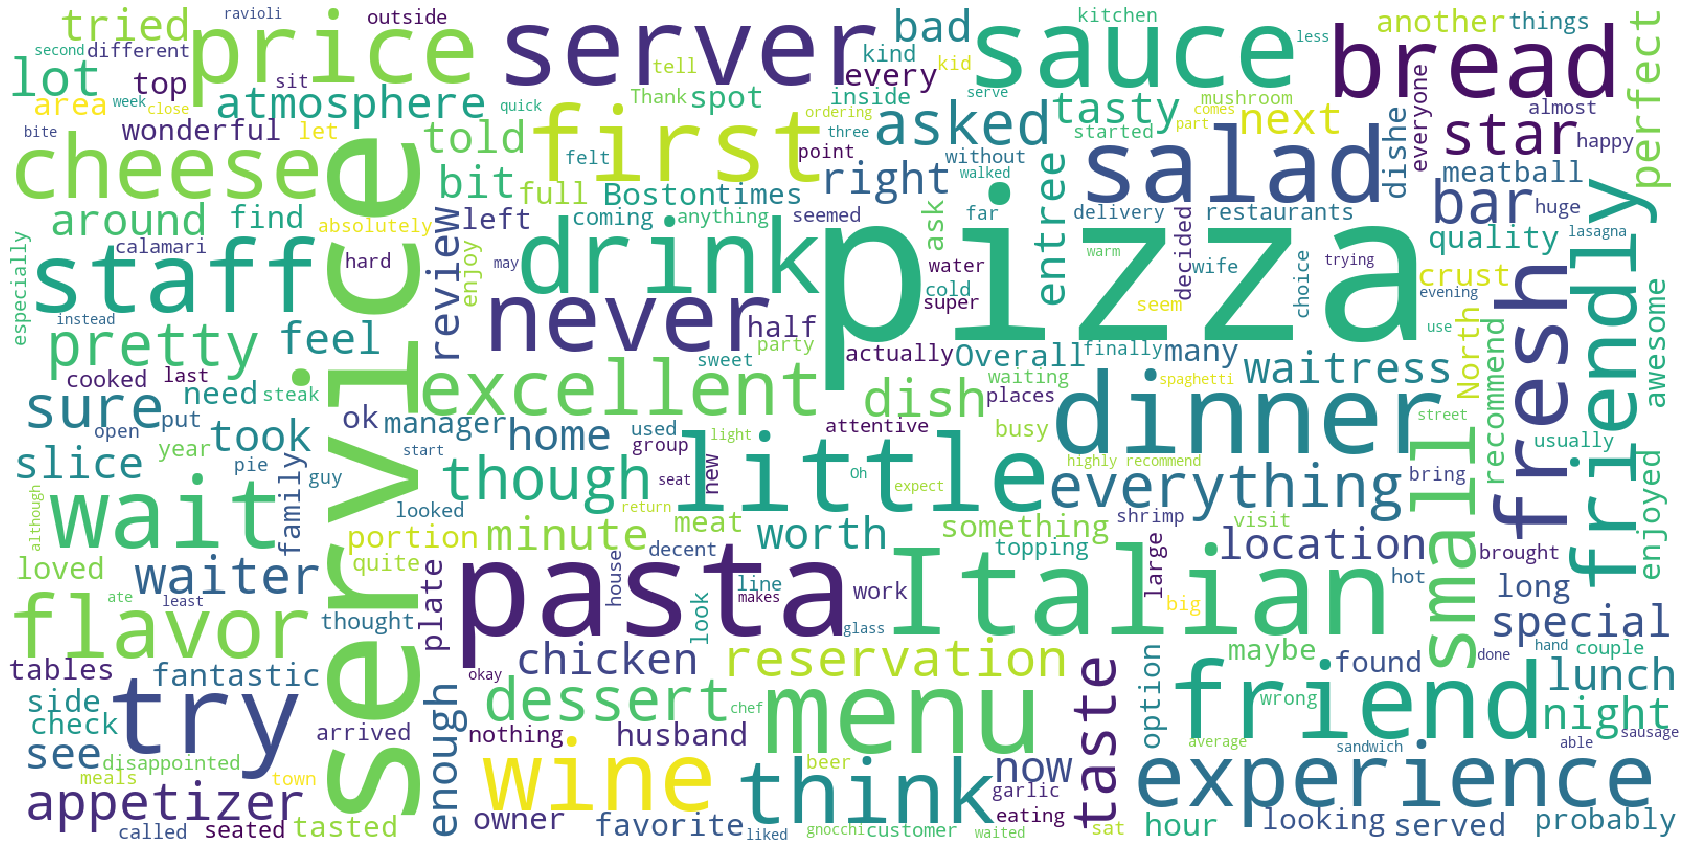

In [11]:
# Italian
reviews = df_review_business[df_review_business['simplified_category'] == "Italian"].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords1)            \
                      .generate(' '.join(reviews['text']))
plot_cloud(wordcloud)

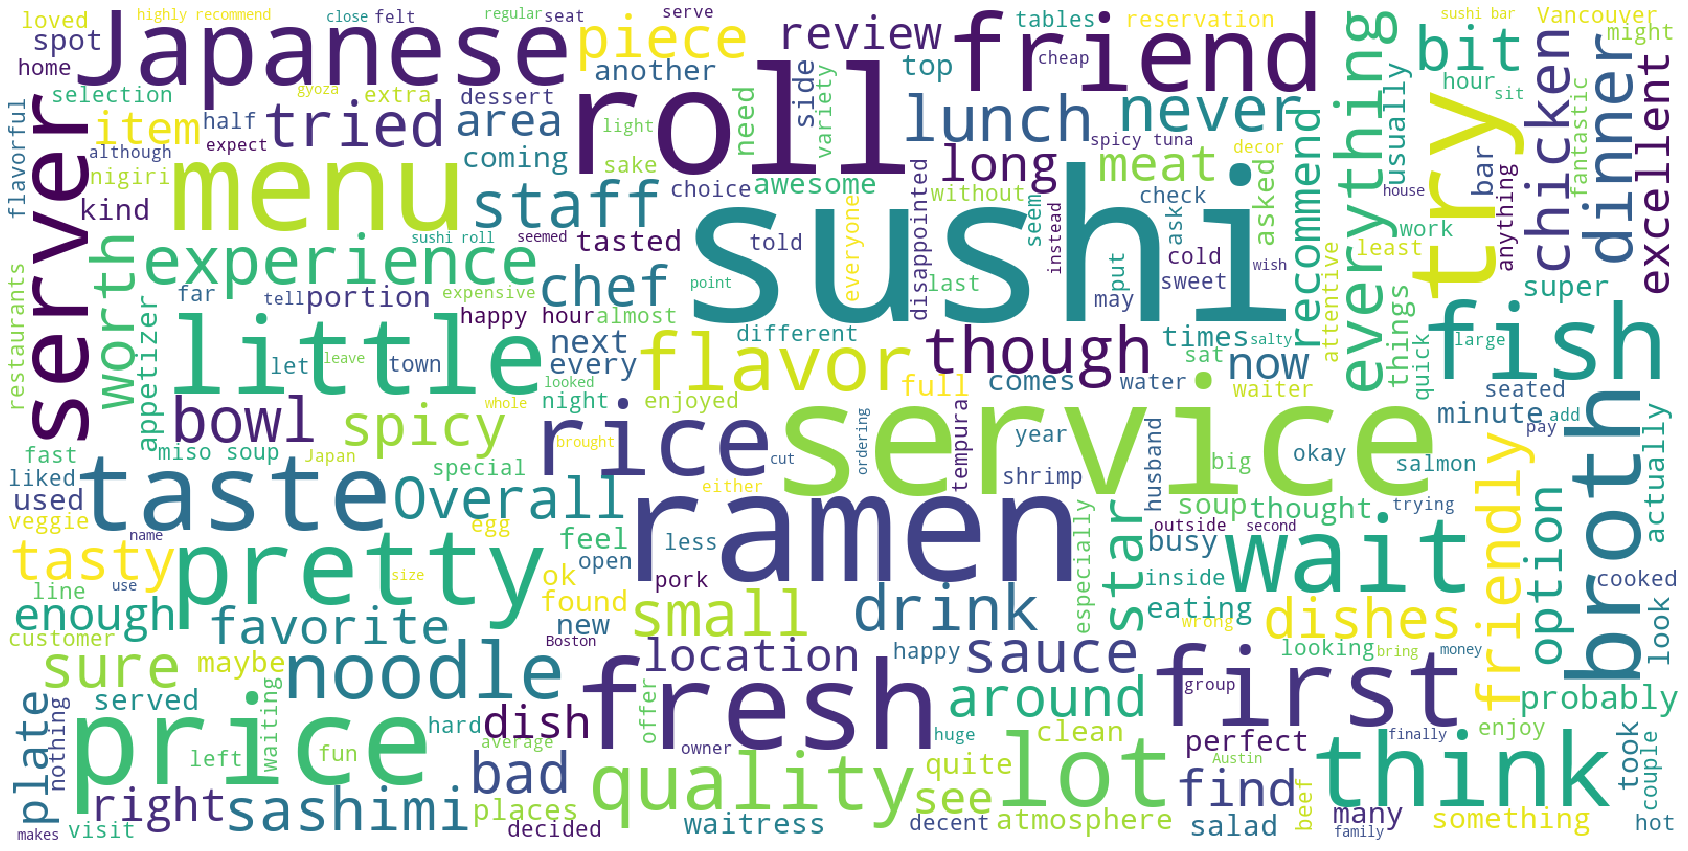

In [12]:
# Japanese
reviews = df_review_business[df_review_business['simplified_category'] == "Japanese"].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords1)            \
                      .generate(' '.join(reviews['text']))
plot_cloud(wordcloud)

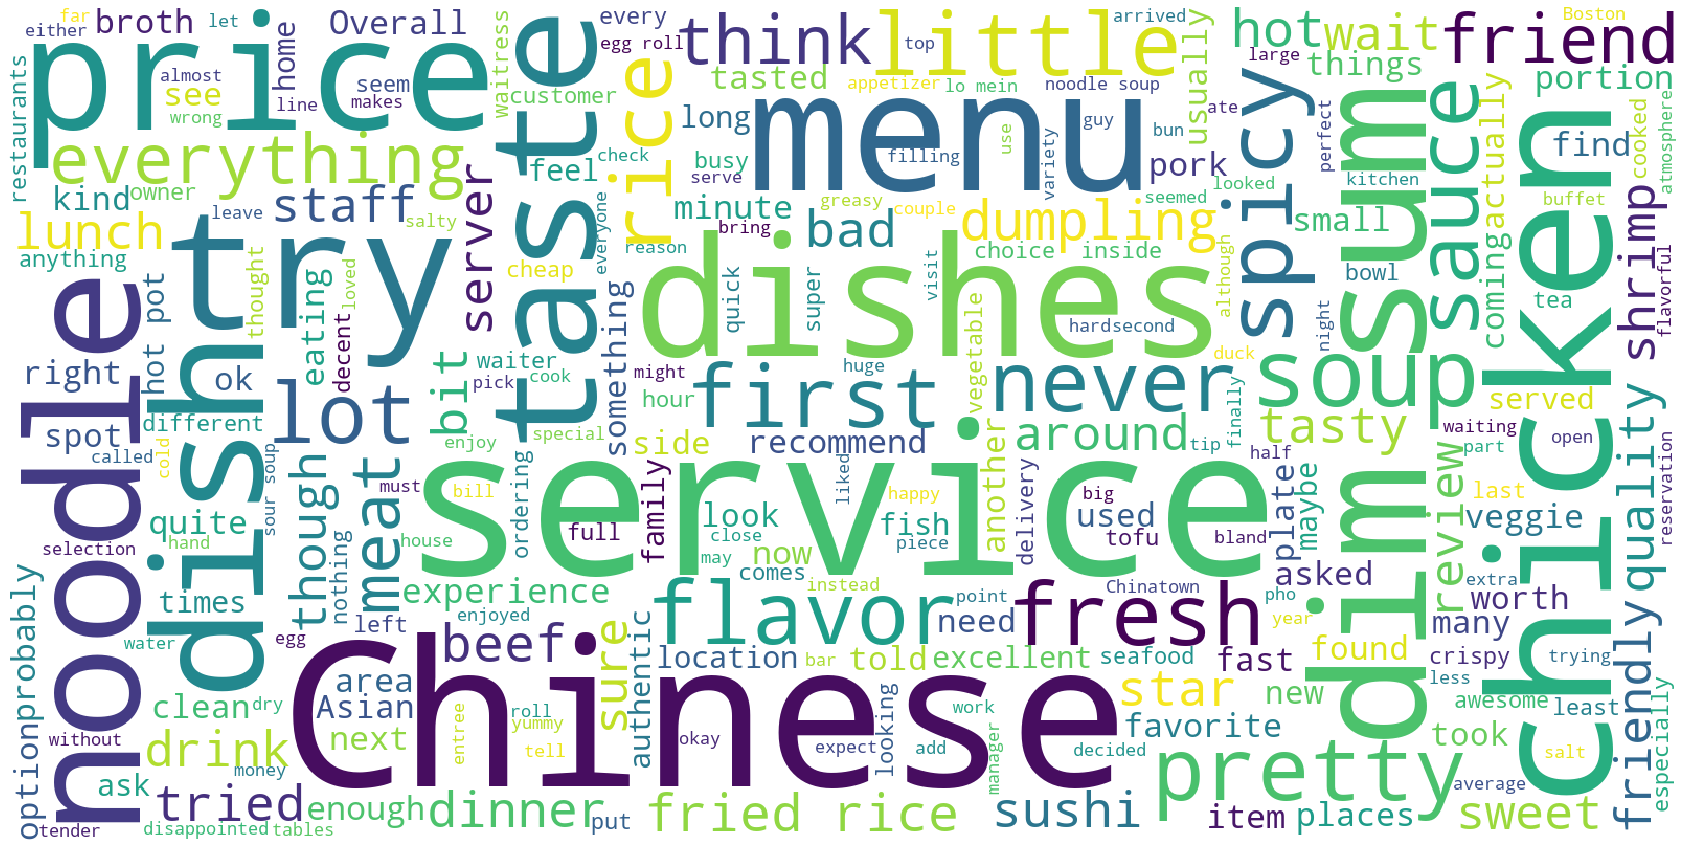

In [13]:
# Chinese
reviews = df_review_business[df_review_business['simplified_category'] == "Chinese"].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords1)            \
                      .generate(' '.join(reviews['text']))
plot_cloud(wordcloud)

## Does Good Reviews and Bad Reviews Use Different Words?

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["place", "one", "still", "give", "people", "someone", "getting", "thing", "much", "eat", "definitely", "us", "day", "know", "going", "make", "take", "say", "two", "gave", "wanted", "want", "u", "really", "come", "came", "way",  "went", "will", "said", "even", "made", "time", "go", "got", "end", "back", "always"])

In [15]:
bad_reviews = df_review_business[df_review_business['stars'] == 1].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords)             \
                      .generate(' '.join(bad_reviews['text']))

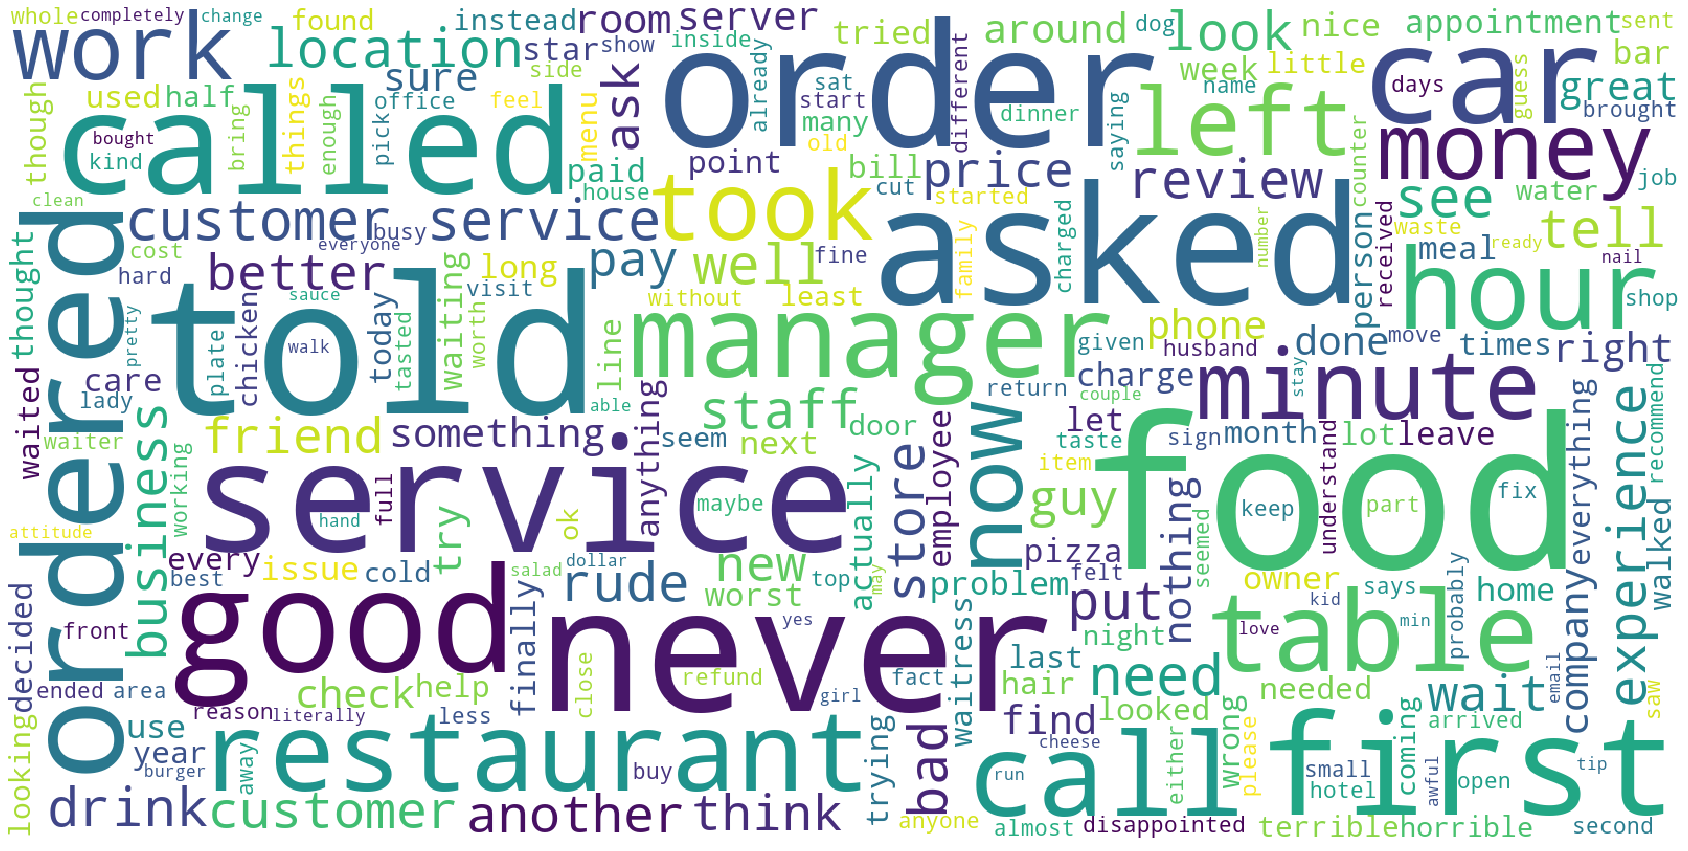

In [16]:
plot_cloud(wordcloud)

In [17]:
good_reviews = df_review_business[df_review_business['stars'] == 5].sample(n = 10000, random_state = 1)
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      collocations = True,               \
                      collocation_threshold = 1,         \
                      stopwords = stopwords)             \
                      .generate(' '.join(good_reviews['text']))

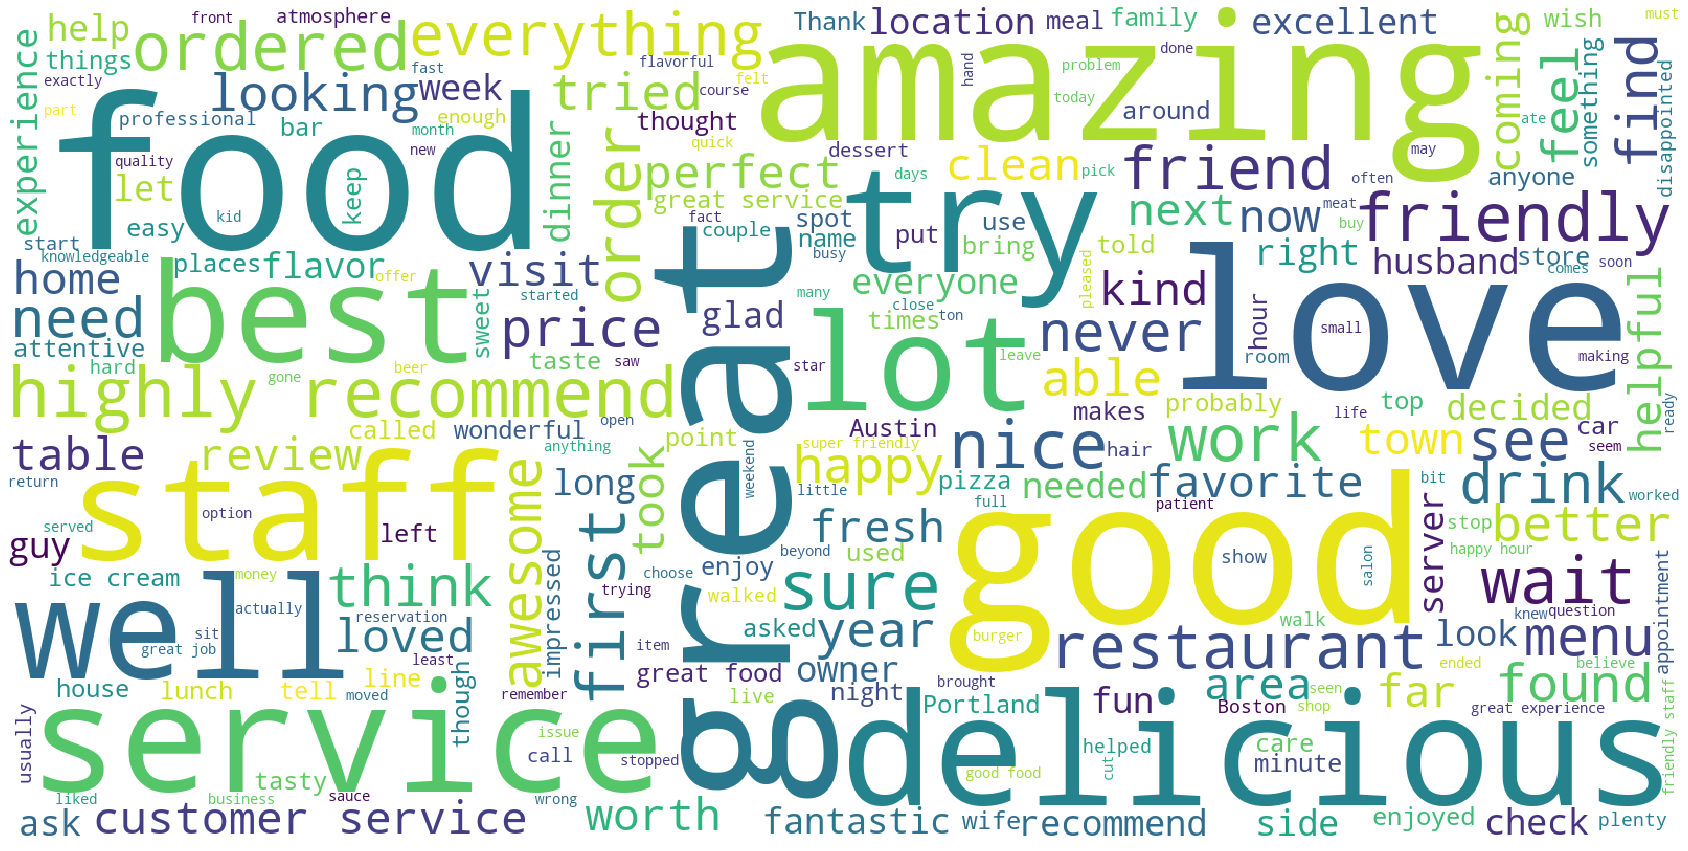

In [18]:
plot_cloud(wordcloud)

Some words are commonly used in both good reviews and bad reviews, such as "food", "service", "restaurant", "good", etc.    
We will be trying to find words that are exclusively used in good and bad reviews respectively.

In [33]:
bad_reviews = df_review_business[df_review_business['stars'] == 1].sample(n = 20000, random_state = 7)
good_reviews = df_review_business[df_review_business['stars'] == 5].sample(n = 20000, random_state = 7)

In [34]:
btext = re.findall(r'[A-Za-z]+', ' '.join(bad_reviews['text']).lower())
gtext = re.findall(r'[A-Za-z]+', ' '.join(good_reviews['text']).lower())
alltext = btext + gtext

In [35]:
bcount = Counter(btext)
gcount = Counter(gtext)
allcount = Counter(alltext)

In [36]:
btotal = sum(bcount.values())
bfreq_percentage = {k: v/btotal for k, v in bcount.items()}
gtotal = sum(bcount.values())
gfreq_percentage = {k: v/gtotal for k, v in gcount.items()}
alltotal = sum(allcount.values())
allfreq_percentage = {k: v/gtotal for k, v in allcount.items()}

In [37]:
bset = set(bfreq_percentage.keys())
gset = set(gfreq_percentage.keys())

In [38]:
allset = bset & gset
gnbset = gset - bset
bngset = bset - gset

In [39]:
gnbdict = {}
for i in gnbset:
    gnbdict[i] = gfreq_percentage[i]
    
bngdict = {}
for i in bngset:
    bngdict[i] = bfreq_percentage[i]
    
alldict = {}
for i in allset:
    alldict[i] = allfreq_percentage[i]

In [40]:
stopwords = set(STOPWORDS)
stopwords.update(['didn', 'go', 's', 't', 'go', 've', 'd', 'm', 'us', 'will', 're', 'got', 'say', 'one'])
for key in stopwords:
  if key in gnbdict:
     del gnbdict[key]
for key in stopwords:
  if key in bngdict:
     del bngdict[key]
for key in stopwords:
  if key in alldict:
     del alldict[key]

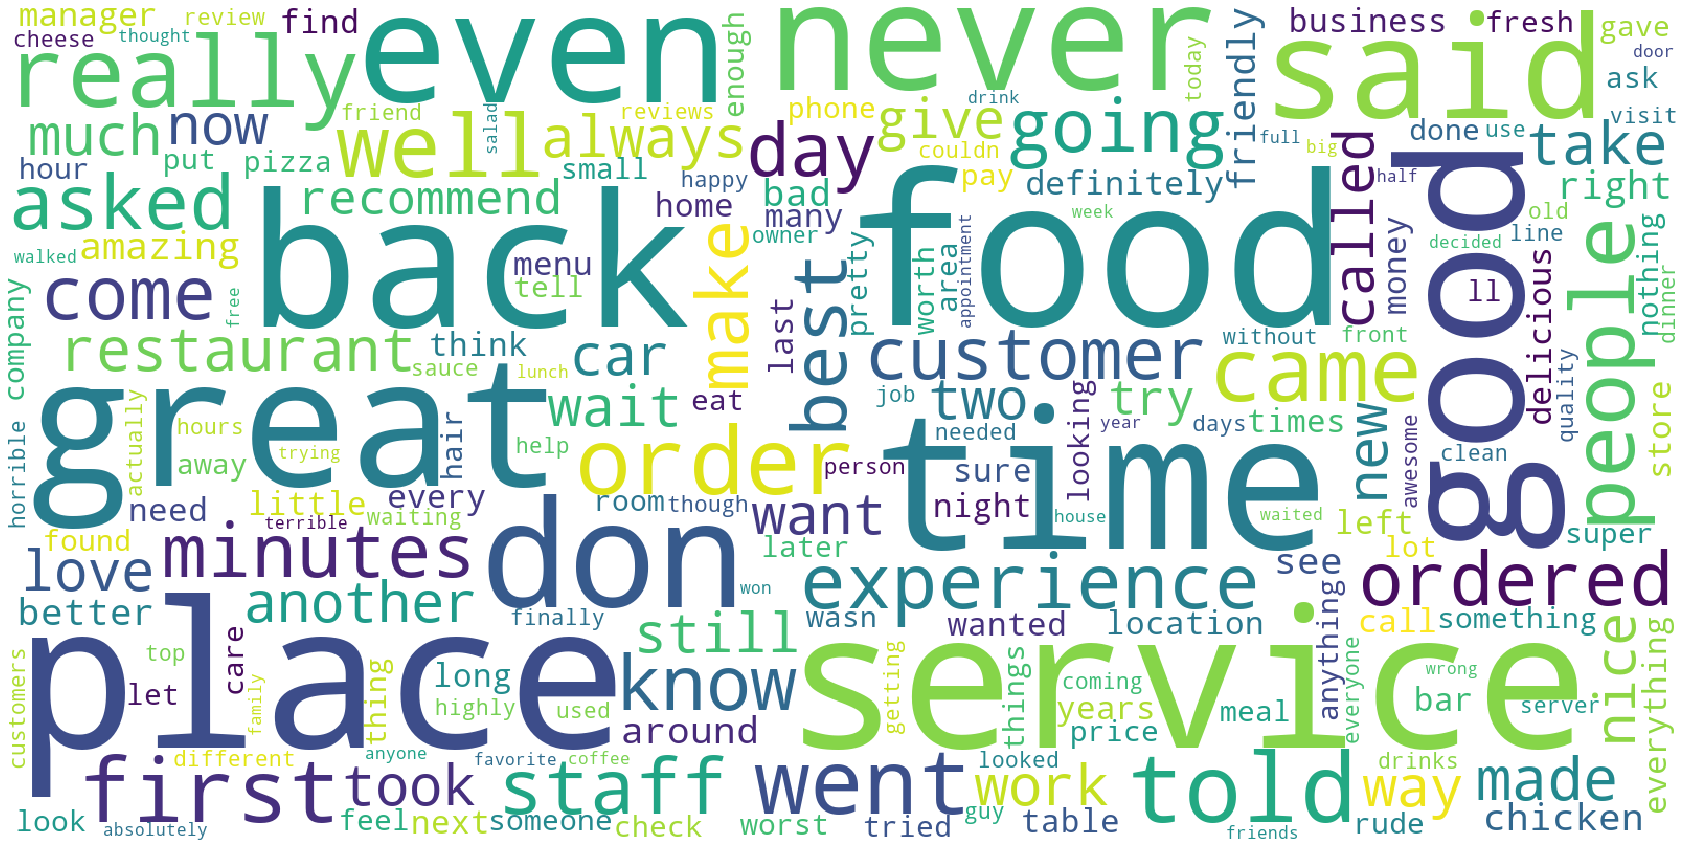

In [41]:
wc = WordCloud(width=1600, height=800,            \
               max_font_size=200,                 \
               max_words=200,                     \
               background_color="white").generate_from_frequencies(alldict)
    
plot_cloud(wc)
wc.to_file('Good_and_bad.png')

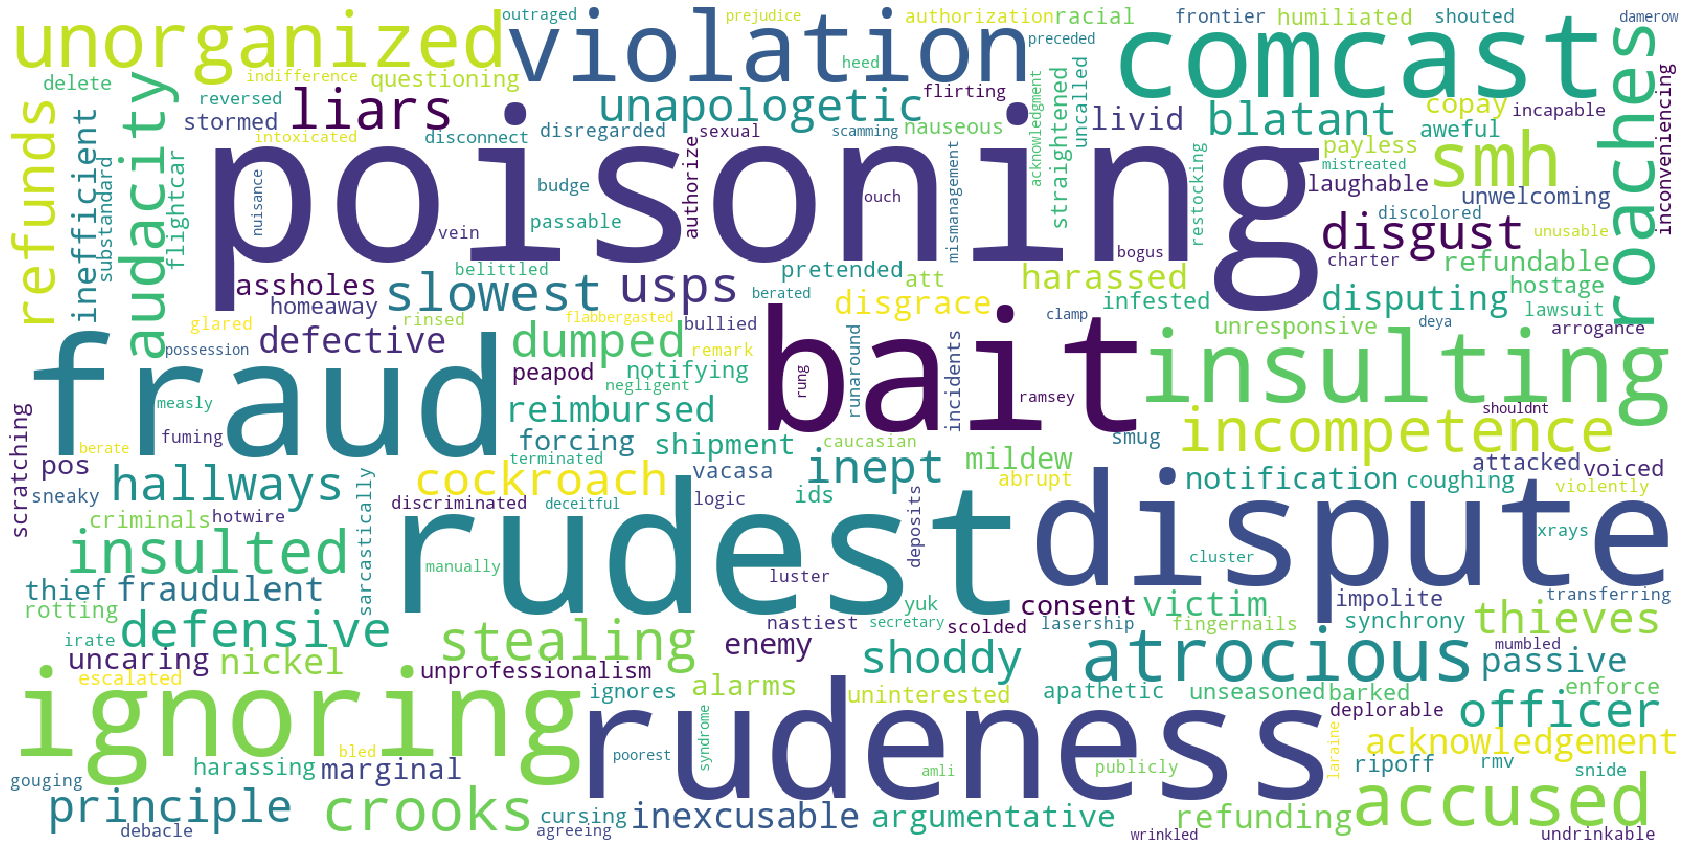

In [28]:
wc = WordCloud(width=1600, height=800,            \
               max_font_size=200,                 \
               max_words=200,                     \
               background_color="white").generate_from_frequencies(bngdict)
    
plot_cloud(wc)
wc.to_file('bad_not_good.png')

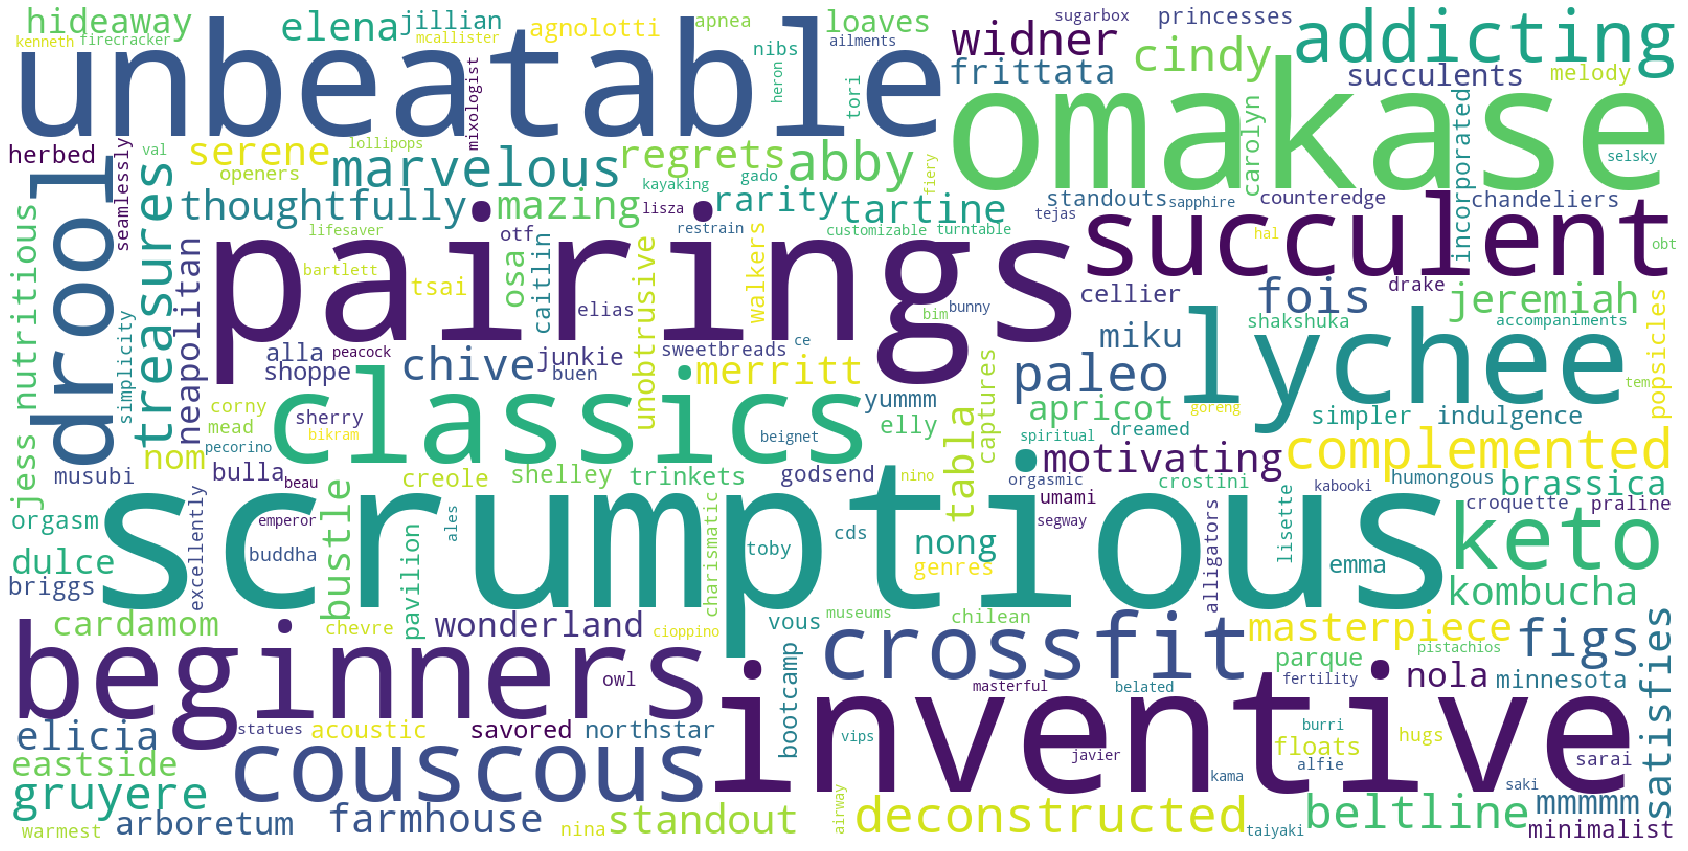

In [29]:
wc = WordCloud(width=1600, height=800,            \
               max_font_size=200,                 \
               max_words=200,                     \
               background_color="white").generate_from_frequencies(gnbdict)
    
plot_cloud(wc)
wc.to_file('Good_not_bad.png')

## Do people use different words after Covid?

In [30]:
query =  'SELECT year(t2.`date`) as year, month(t2.`date`) as month, t2.text as text, t2.stars as stars, t1.simplified_category FROM business_basicdata t1 INNER JOIN review t2 ON t1.business_id = t2.business_id'
cursor.execute(query)
res = cursor.fetchall()
df_time_review = pd.DataFrame(res, columns = [i[0] for i in cursor.description])

In [31]:
df_time_review.head()

year  month                                               text  stars  \
0  2009     12  I have been going there on and off for about 6...    4.0   
1  2010      6  As a person who is mostly a vegetarian, someti...    2.0   
2  2017      5  Pretty average fare at an ok price. Service wa...    3.0   
3  2012      9  Best neighborhood pizza in Arlington Heights. ...    4.0   
4  2018      4  Went in to see our favorite bartender only to ...    1.0   

  t1.simplified_category  
0                Italian  
1               American  
2                 Korean  
3                  Pizza  
4               American

In [32]:
df_review_before = df_time_review[df_time_review['year'] <= 2020].sample(n = 15000, random_state = 1)
df_review_after = df_time_review[df_time_review['year'] > 2020].sample(n = 15000, random_state = 1)

In [33]:
stopwords2 = set(STOPWORDS)

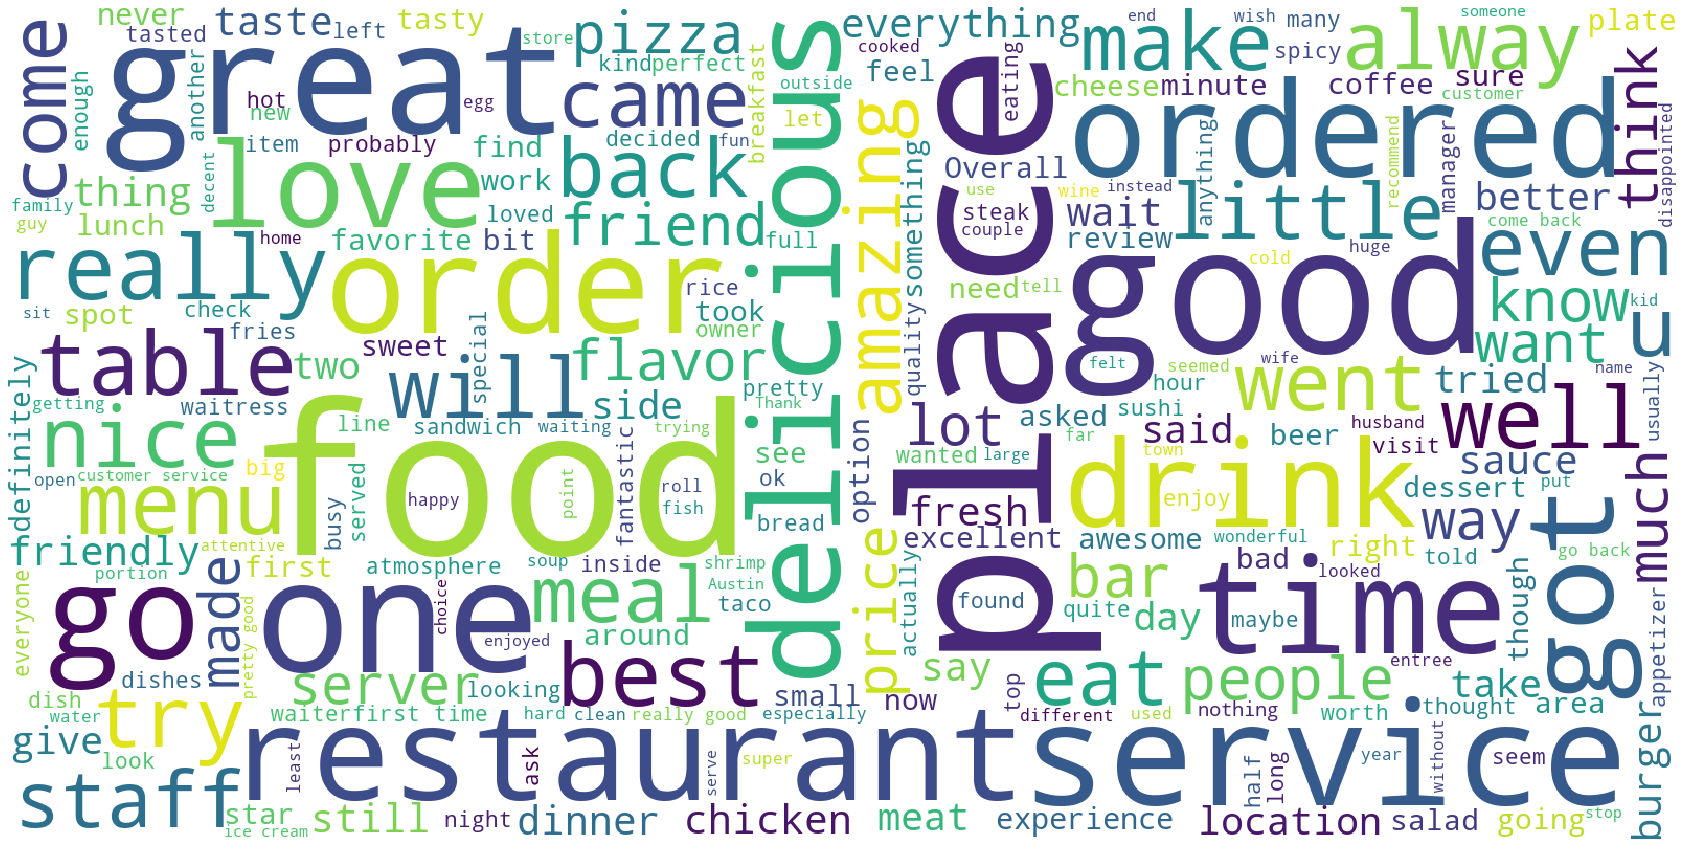

In [34]:
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords2)            \
                      .generate(' '.join(df_review_before['text']))
    
plot_cloud(wordcloud)

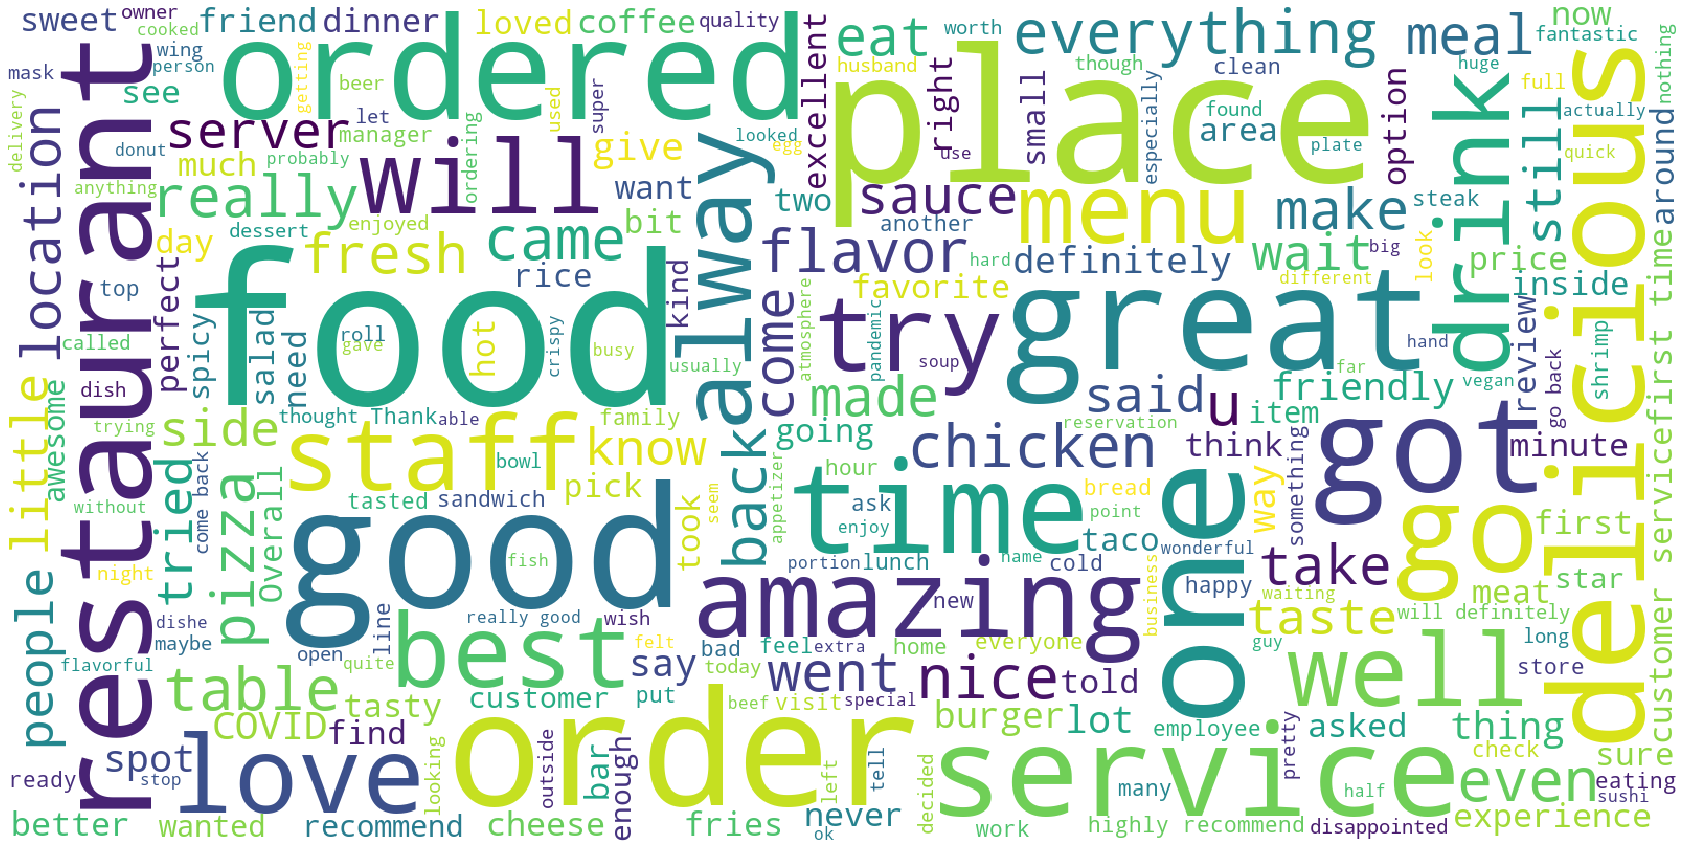

In [35]:
wordcloud = WordCloud(width=1600, height=800,            \
                      max_font_size=200,                 \
                      max_words=250,                     \
                      background_color="white",          \
                      stopwords = stopwords2)            \
                      .generate(' '.join(df_review_after['text']))
    
plot_cloud(wordcloud)

## Venn Diagrams

In [48]:
import matplotlib_venn_wordcloud
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import ImageColorGenerator

In [31]:
L = np.array(Image.open("L.png"))
M = np.array(Image.open("mid.png"))
R = np.array(Image.open("R.png"))

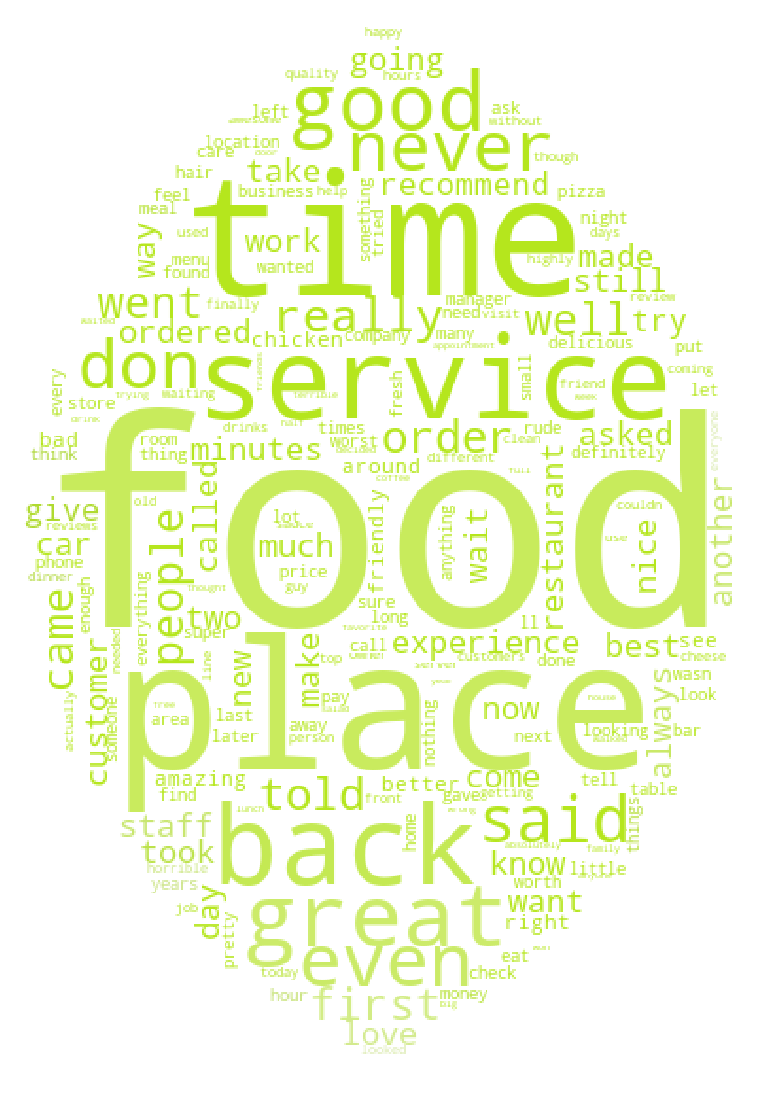

In [51]:
mask_colors = ImageColorGenerator(M)
wc = WordCloud(max_font_size=200,                 \
               max_words=200,                     \
               background_color="white",          \
               mask = M,                          \
               width = M.shape[1],                \
               height = M.shape[0],               \
               color_func = mask_colors).generate_from_frequencies(alldict)
    
plot_cloud(wc)
wc.to_file('Good_and_bad_M.png')

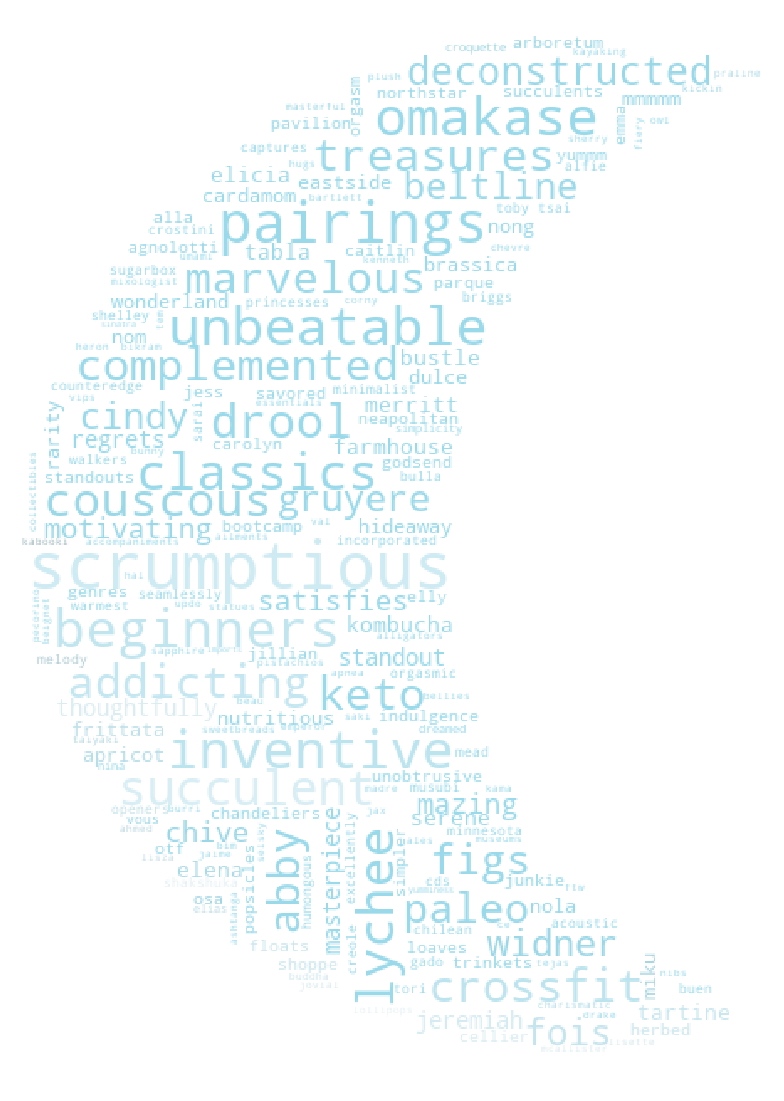

In [54]:
mask_colors = ImageColorGenerator(L)
wc = WordCloud(max_font_size=200,                 \
               max_words=200,                     \
               background_color="white",          \
               mask = L,                          \
               width = L.shape[1],                \
               height = L.shape[0],               \
               color_func = mask_colors).generate_from_frequencies(gnbdict)
    
plot_cloud(wc)
wc.to_file('Good_M.png')

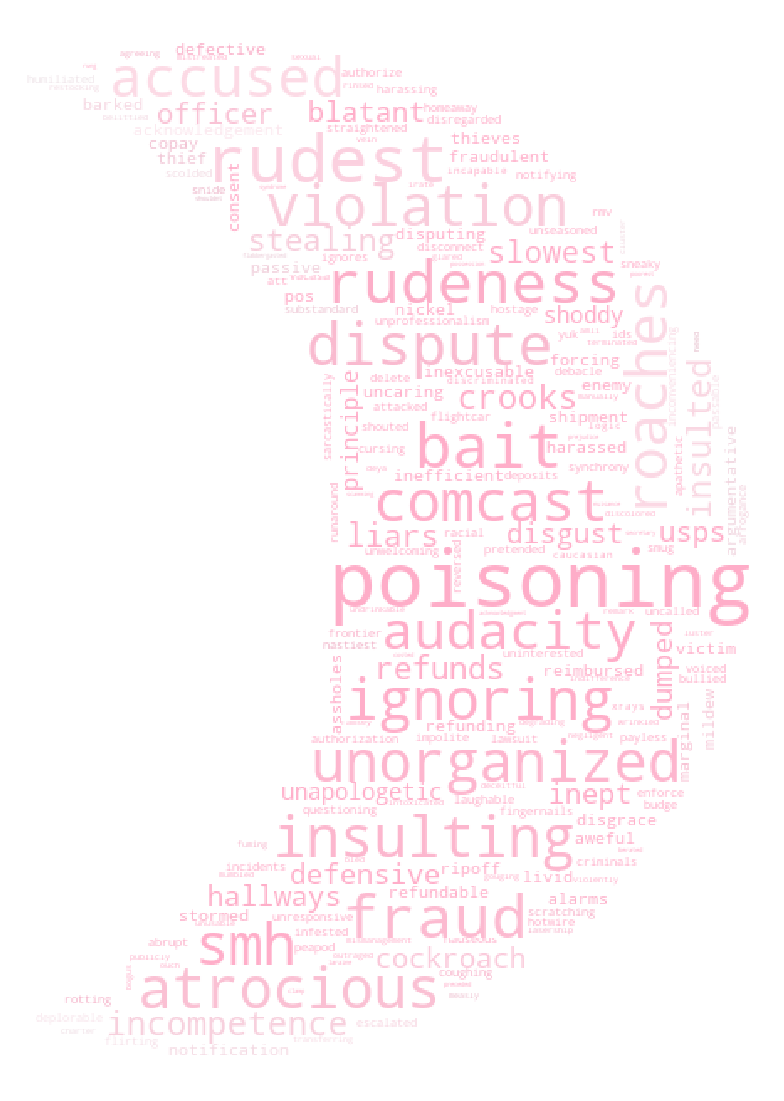

In [53]:
mask_colors = ImageColorGenerator(R)
wc = WordCloud(max_font_size=200,                 \
               max_words=200,                     \
               background_color="white",          \
               mask = R,                          \
               width = R.shape[1],                \
               height = R.shape[0],               \
               color_func=mask_colors).generate_from_frequencies(bngdict)
    
plot_cloud(wc)
wc.to_file('Bad_M.png')